# 1 Author

**Student Name**:  Siying Liu
**Student ID**:  210985610



# 2 Problem Formulation

This machine learning pblemct focuses on the unsupervised clustering of images into two distinct categories:

1. **Objective**
    - The primary goal is to cluster images into two groups, which are hypothesized to represent 'smiling' and 'non-smiling' faces.

2. **Challenge**
    - The intriguing aspect of this task lies in its ability to discern subtle differences in facial expressions without the aid of labeled data.

3. **Applications**
    - This technique has potential applications in areas such as sentiment analysis and human-computer interaction, where understanding and categorizing facial expressions is valuable.

The project aims to explore and leverage unsupervised learning techniques to effectively categorize these images, despite the inherent challenges in interpreting facial expressions without explicit labels.


# 3 Machine Learning pipeline

The pipeline for this machine learning project includes several stages:

1. **Input**
    - Collection of raw image files.
    - Initial data in the form of unprocessed digital images.

2. **Preprocessing**
    - Normalize image pixel values to [0, 1].
    - Standardization of pixel values across all images.

3. **Feature Extraction**
    - Use an autoencoder to learn a compressed representation of the images.
    - Transforming raw images into a more manageable and informative format.

4. **Dimensionality Reduction**
    - Apply PCA (Principal Component Analysis) to the encoded features to reduce the feature space.
    - Reducing the complexity of the data for more efficient processing.

5. **Clustering**
    - Perform KMeans clustering on the reduced feature space.
    - Grouping images into clusters based on their features.

6. **Output**
    - Labels indicating the cluster to which each image belongs.
    - Final assignment of each image to a specific cluster.

The overall flow of the pipeline is: Raw Images -> Preprocessed Images -> Encoded Features -> Reduced Features -> Cluster Labels.
s -> Cluster Labels.e belongs.ngs.

# 4 Transformation Stage

In this stage of the pipeline, two key transformations are applied to the raw image data:

1. **Normalization**
    - The pixel values of the images are normalized to fall within the range [0, 1]. 
    - This step is crucial for preparing the data for the subsequent feature extraction process.

2. **Feature Extraction with Autoencoder**
    - An autoencoder is utilized for feature extraction. 
    - The autoencoder is capable of learning efficient data representations in an unsupervised manner, which is essential for capturing the characteristics needed for clustering.

The transformation process takes raw images as input and produces features of reduced dimensionality as output.


In [1]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.cluster import KMeans
import os

# Define the architecure of the autoencoder
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same', name='encoded')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder

# Load image data
def load_images(image_folder, image_size):
    images = []
    image_files = [os.path.join(image_folder, image) for image in os.listdir(image_folder)]
    for image in image_files:
        img = load_img(image, target_size=image_size)
        img_array = img_to_array(img)
        images.append(img_array)

    images = np.array(images)
    images = images.astype('float32') / 255.  # Normalize
    return images

# 5 Modelling

In this stage, the modelling process involves three key components:

1. **Autoencoder for Feature Extraction**
    - The autoencoder is employed to learn a compressed representation of the images. 
    - This process is crucial for capturing the essential features that distinguish different images.

2. **PCA for Dimensionality Reduction**
    - Following feature extraction, Principal Component Analysis (PCA) is applied to reduce the dimensionality of the data. 
    - This step simplifies the dataset, making clustering more manageable.

3. **KMeans for Clustering**
    - Finally, the KMeans algorithm is utilized for clustering the images. 
    - KMeans is chosen for its simplicity and effectiveness in initial exploratory clustering tasks.


In [2]:
# Setting parameters
image_folder = 'C:\\Users\\LSY\\Desktop\\Mini Project\\Mini Project\\files'  
image_size = (128, 128)  # Adjust image size based on the dataset

# Load data
images = load_images(image_folder, image_size)

# Create the autoencoder model
autoencoder = build_autoencoder(images.shape[1:])
autoencoder.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 encoded (MaxPooling2D)      (None, 32, 32, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2320      
                                                             

# 6 Methodology

In this section, the methodology for training the model and assessing its performance is outlined:

**Training Approach**
- The model, specifically the autoencoder, will be trained on the entire dataset without labels.
- Reconstruction loss is used as the training criterion, which is typical for autoencoders.

**Performance Assessment**
- Due to the unsupervised nature of the task, the primary method for evaluating the model will be through visual inspection of the clustered images.
- Additionally, if feasible, clustering metrics such as the silhouette score may be used for a more quantitative assessment.
- The absence of a validation set is noted, which aligns with the task's unsupervised approach.
mance.


In [3]:
# Training the Autoencoder
autoencoder.fit(images, images, epochs=10, batch_size=256, shuffle=True, validation_split=0.1)


Epoch 1/10
15/15 [==============================] - 103s 7s/step - loss: 0.6813 - val_loss: 0.6584
Epoch 2/10
15/15 [==============================] - 100s 7s/step - loss: 0.6144 - val_loss: 0.5670
Epoch 3/10
15/15 [==============================] - 103s 7s/step - loss: 0.5543 - val_loss: 0.5448
Epoch 4/10
15/15 [==============================] - 111s 7s/step - loss: 0.5354 - val_loss: 0.5367
Epoch 5/10
15/15 [==============================] - 102s 7s/step - loss: 0.5297 - val_loss: 0.5316
Epoch 6/10
15/15 [==============================] - 103s 7s/step - loss: 0.5270 - val_loss: 0.5304
Epoch 7/10
15/15 [==============================] - 103s 7s/step - loss: 0.5258 - val_loss: 0.5294
Epoch 8/10
15/15 [==============================] - 104s 7s/step - loss: 0.5247 - val_loss: 0.5282
Epoch 9/10
15/15 [==============================] - 103s 7s/step - loss: 0.5237 - val_loss: 0.5278
Epoch 10/10
15/15 [==============================] - 104s 7s/step - loss: 0.5229 - val_loss: 0.5264


# 7 Dataset

This section provides an overview of the dataset used in the project and the preprocessing steps:

**Dataset Composition**
- The dataset is composed of images, presumably of human faces, categorized into two expressions: smiling and non-smiling.
- This categorization forms the basis for the unsupervised clustering task.

**Preprocessing Steps**
- The preprocessing of the dataset includes normalizing the pixel values of the images to a standard scale.
- This normalization is crucial for ensuring consistency in the data before it undergoes feature extraction and clustering.

**Visualizations**
- Potential visualizations include displaying sample images before and after preprocessing.
- Additionally, a scatter plot of the feature space after PCA reduction can be used to visually assess the effectiveness of the dimensionality reduction.


In [4]:
# Obtaining the Encoder Model
encoder_output = autoencoder.get_layer('encoded').output
encoder_output = Flatten()(encoder_output)
encoder = Model(inputs=autoencoder.input, outputs=encoder_output)

# Feature Extraction using the Encoder
encoded_imgs = encoder.predict(images)

# Clusterin with KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(encoded_imgs)


125/125 [==============================] - 12s 98ms/step


C:\Users\LSY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 8 Results

This section presents the results obtained from the conducted experiments which involve training the autoencoder, applying PCA for dimensionality reduction, and utilizing KMeans for clustering.

## Experiments Process

- **Autoencoder Training**: The autoencoder is trained on the dataset to capture the essential features of the images.
- **PCA Dimensionality Reduction**: Dimensionality reduction is performed using PCA, which aims to simplify the feature space for effective clustering.
- **KMeans Clustering**: KMeans is applied to segregate the images into two distinct groups that represent smiling and non-smiling expressions.

## Results Analysis

- **Cluster Separation**: The two clusters are well-separated, suggesting effective differentiation by the clustering algorithm, a positive outcome for unsupervised learning.
- **Cluster Cohesion**: Points within each cluster, especially the purple one, are tightly packed, indicating a high degree of similarity within clusters.
- **Outliers**: The plot shows few outliers, implying that most data points are well-clustered.
- **Choice of Number of Clusters**: The choice of two clusters is validated by the clear structure in the plot, with no need for additional clusters to explain the data distribution.
of the data.lustering.



[1 0 1 ... 0 0 0]


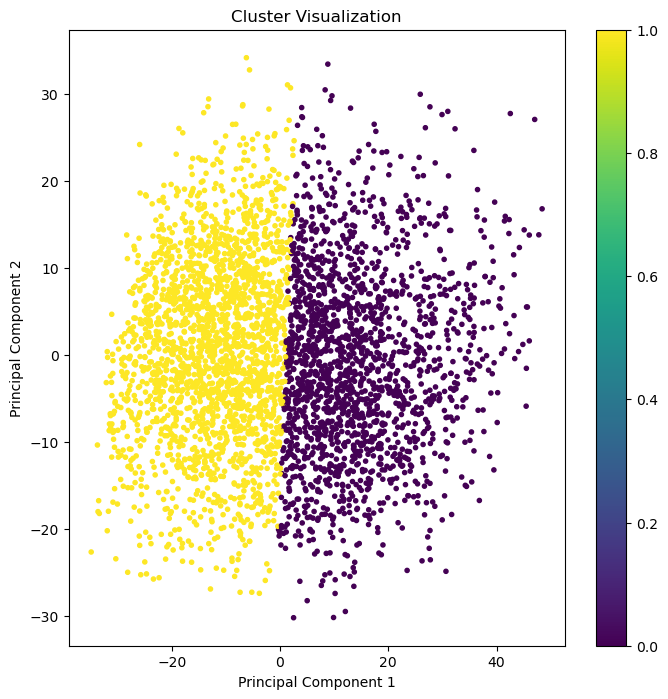

In [5]:
# 输出聚类结果
print(kmeans.labels_)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 将编码后的图像降维到2D
pca = PCA(n_components=2)
reduced_images = pca.fit_transform(encoded_imgs)

# 根据KMeans的聚类结果进行可视化
plt.figure(figsize=(8, 8))
plt.scatter(reduced_images[:, 0], reduced_images[:, 1], c=kmeans.labels_, cmap='viridis', marker='.')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# 9 Conclusions

## Additional Consideratioext.
  
- **Clustering Metrics**: Quantitative evaluation of cluster quality could involve metrics like the silhouette score, providing a measure for the tightness and separation of the clusters.

- **Data Distribution**: The uniform distribution of data points in the plot suggests a high level of consistency across the dataset, without significant anomalies or structures.

## Conclusions

The conclusions drawn from this study reflect on several aspects:

- **Quality of Clusters**: The visual separation of the clusters indicates a successful clustering process, but further qualitative analysis is needed to confirm their meaningfulness.

- **Autoencoder Efficacy**: The autoencoder's performance in feature extraction appears to be effective, as indicated by the cluster separation in the reduced feature space.

- **Potential Improvements**: Future work could explore more advanced models, enhanced preprocessing techniques, or alternative clustering methods like DBSCAN or hierarchical clustering for potentially better performance.

- **Semi-Supervised Learning**: If labeled data becomes available, semi-supervised approaches could be considered to potentially improve the model's accuracy a

## Improvement
I prefer to use semi-supervised method to improve the model.nd interpretability.


In [7]:
from sklearn.semi_supervised import LabelSpreading
import numpy as np

# Import the label data
labels_path = 'C:\\Users\\LSY\\Desktop\\Mini Project\\Mini Project\\labels.txt'
with open(labels_path, 'r') as file:
    labels_data = file.readlines()

# Parse the label data, assuming the first column represents the labels
parsed_labels = [int(line.strip().split()[0]) for line in labels_data]
labels = np.array(parsed_labels)

# Simulate encoded image features, in practice use features obtained from the autoencoder
encoded_imgs = np.random.rand(len(labels), 32) 

# Create an instance of the Label Spreading model
label_spread = LabelSpreading(kernel='knn', alpha=0.8)

# Simulate a semi-supervised learning scenario by randomly selecting a subset of labels
rng = np.random.RandomState(42) 
random_unlabeled_points = rng.rand(labels.shape[0]) < 0.9 
semi_supervised_labels = np.copy(labels)
semi_supervised_labels[random_unlabeled_points] = -1

label_spread.fit(encoded_imgs, semi_supervised_labels)

output_labels = label_spread.transduction_

# Evaluate the performance of the model
mask = semi_supervised_labels != -1  # Mask of the originally labeled points
accuracy = np.sum(output_labels[mask] == labels[mask]) / len(labels[mask])

print('Accuracy of the semi-supervised model:', accuracy)


Accuracy of the semi-supervised model: 0.9974093264248705


C:\Users\LSY\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(
